In [1]:
using QuadGK
using Plots

In this notebook I will compare different projection methods.

1. Fourier Sine Projection
2. Jacobi Polynomials
3. Exponential Radial Basis Interpolation
4. Bump Function Radial Basis Interpolation

In [2]:
# Test Functions
F(x) = x^2
G(x) = √2 * sin(2π*x)

# Plotting Grid
npoints = 201
X = range(0, 1, length=npoints)

0.0:0.005:1.0

In [14]:
include("src/plotters.jl")
include("src/interpolation.jl")
include("src/linesearch.jl")
include("src/transform.jl")
include("src/projection.jl");

## Fourier Sine Series Projection 

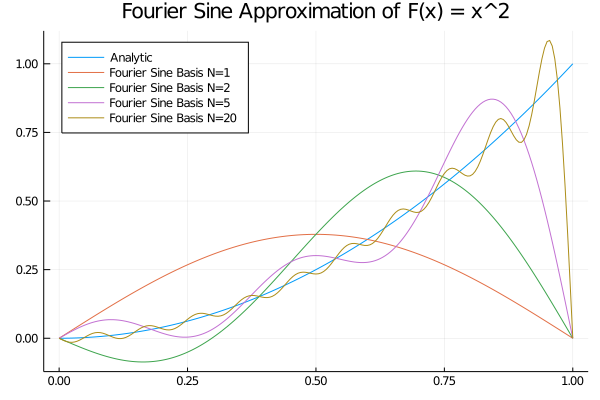

In [16]:
plot(F, X, label="Analytic", title="Fourier Sine Approximation of F(x) = x^2")
for n in [1, 2, 5, 20]
    f = project(F, basis_fourier_sine(n))
    plot!(f, X, label="Fourier Sine Basis N=$n", legend=:topleft)
end
display(plot!())

## Jacobi Polynomial Projection

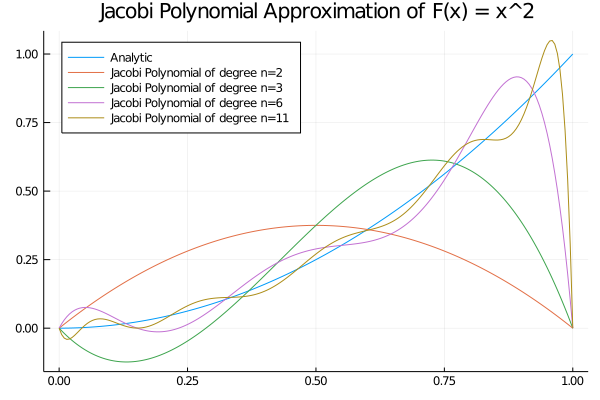

In [17]:
plot(F, X, label="Analytic", title="Jacobi Polynomial Approximation of F(x) = x^2")
for n in [1, 2, 5, 10]
    f = project(F, basis_jacobi_polynomials(n))
    plot!(f, X, label="Jacobi Polynomial of degree n=$(n+1)", legend=:topleft)
end
display(plot!())

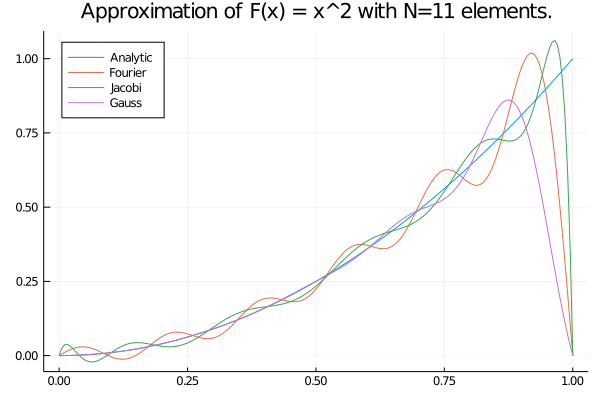

In [35]:
N = 11

F_fourier = project(F, basis_fourier_sine(N))
F_jacobi = project(F, basis_jacobi_polynomials(N))
F_gauss = interpolate(F, N)

plot(F, X, title="Approximation of F(x) = x^2 with N=$N elements.",
    label="Analytic", legend=:topleft)
plot!(F_fourier, X, label="Fourier")
plot!(F_jacobi, X, label="Jacobi")
plot!(F_gauss, X, label="Gauss")

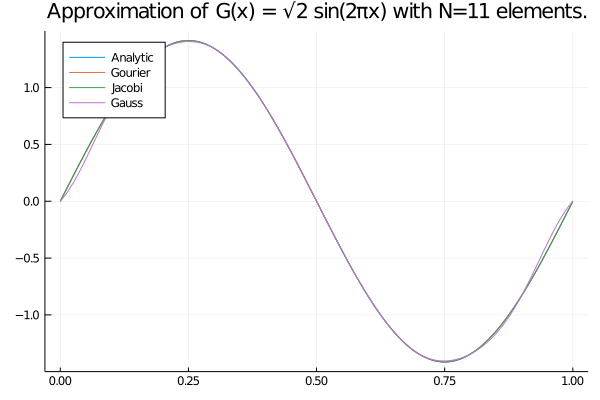

In [36]:
N = 11

G_fourier = project(G, basis_fourier_sine(N))
G_jacobi = project(G, basis_jacobi_polynomials(N))
G_gauss = interpolate(G, N)

plot(G, X, title="Approximation of G(x) = √2 sin(2πx) with N=$N elements.",
    label="Analytic", legend=:topleft)
plot!(G_fourier, X, label="Fourier")
plot!(G_jacobi, X, label="Jacobi")
plot!(G_gauss, X, label="Gauss")

## Interpolation by Radial Basis Functions

In [ ]:
function projection_error_fourier(f, nmax)
    error = Array{Float64}(undef, nmax)
    for N in 1:nmax
        projf = project(f, basis_fourier_sine(N))
        error[N] = l2_distance(f, projf)
    end
    return error
end


function projection_error_jacobi(f, nmax)
    error = Array{Float64}(undef, nmax)
    for N in 1:nmax
        projf = project(f, basis_jacobi_polynomials(N))
        error[N] = l2_distance(f, projf)
    end
    return error
end

function interpolation_error_gaussian(f, nmax)
    error = Array{Float64}(undef, nmax)
    error[1:2] .= NaN
    for N in 3:nmax
        interpf = interpolate(f, N, param=10.)
        error[N] = l2_distance(f, interpf)
    end
    return error
end

  0.010832 seconds (80.12 k allocations: 1.760 MiB)
  0.003171 seconds (14.94 k allocations: 637.766 KiB)
  0.003533 seconds (6.05 k allocations: 331.219 KiB)


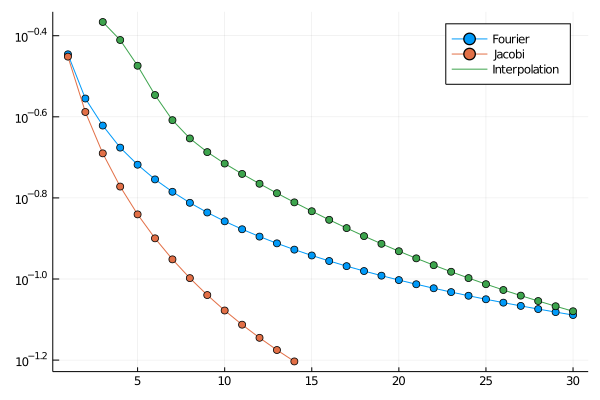

In [46]:
@time error_fourier = projection_error_fourier(F, 30)
plot(error_fourier, shape=:circle, label="Fourier", yscale=:log10)

@time error_jacobi = projection_error_jacobi(F, 14)
plot!(error_jacobi, shape=:circle, label="Jacobi")

@time error_interp = interpolation_error_gaussian(F, 30)
plot!(error_interp, shape=:circle, label="Interpolation")

In [38]:
@time error_fourier = projection_error_fourier(G, 30)
plot(error_fourier, shape=:circle, label="Fourier")

LoadError: InterruptException:

In [39]:
@time error_jacobi = projection_error_jacobi(G, 14)
plot!(error_jacobi, shape=:circle, label="Jacobi")

LoadError: InterruptException:

  0.008146 seconds (8.76 k allocations: 394.328 KiB)


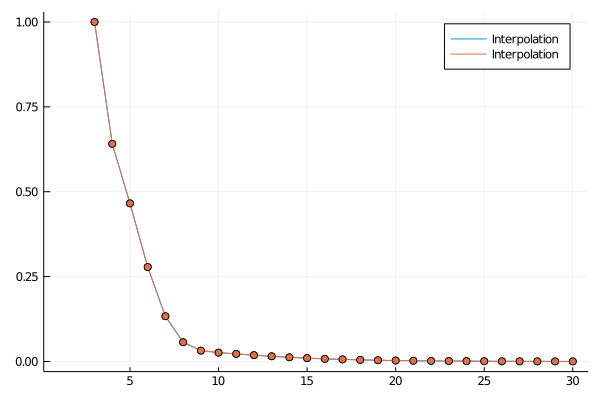

In [42]:
@time error_interp = interpolation_error_gaussian(G, 30)
plot!(error_interp, shape=:circle, label="Interpolation")

## Gallery of Radial Basis Functions

In [8]:
using LinearAlgebra: Symmetric

# First create a library of basis functions
function rbf_gaussian(center, ε)
    function (x)
        return exp(-ε*(x - center)^2)
    end
end

function rbf_multiquadratic(center, ε)
    function (x)
        return sqrt(1 + (ε*(x - center))^2)
    end
end

function rbf_inverse_multiquadratic(center, ε)
    function (x)
        return 1 / sqrt(1 + (ε*(x - center))^2)
    end
end

function rbf_inverse_quadratic(center, ε)
    function (x)
        return 1 / (1 + (ε*(x - center))^2)
    end
end

function rbf_bump_function(center, ε)
    function (x)
        if abs(x - center) < 1. / ε
            return exp(- 1. / (1 - (ε*(x - center))^2))
        end
        return 0.
    end
end



# Create function for visualizing different types of RBFs
function plot_rbf(rbf_type; title="")
    X_radial = -0.5:0.005:0.5
    p = plot(title=title)
    for ε in [1.0, 5., 10., 20., 100.]
        b = rbf_type(0, ε)
        plot!(b, X_radial, label="\$ \\varepsilon = $ε \$")
    end
    return p
end


# Create list of all functions to be plotted.
rbf_types = [rbf_gaussian, rbf_multiquadratic, rbf_inverse_multiquadratic, rbf_inverse_quadratic, rbf_bump_function]
rbf_titles = ["Gaussian", "Multiquadratic", "Inverse Multiquadratic", "Inverse Quadratic", "Bump Functions"]
rbf_plots = [plot_rbf(t, title=tit) for (t, tit) in zip(rbf_types, rbf_titles)]

plot(rbf_plots...,  layout=5, size=(900, 600))

rbf_bump_function (generic function with 1 method)